**INTRODUCCION A EDA:**

Vamos a trabajar con el conjunto de datos Titanic de Kaggle. 

Intentaremos predecir una clasificación: supervivencia o muerte. Veamos primero la regresión logística en Python la cual se usa para clasificación.

Vamos a usar una versión "semilimpia" del conjunto de datos Titanic, la data de Kaggle debe ser limpiada previamente, como hacerlo lo veremos en proximas sesiones.



**Importar bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Loading Data**

PassengerId: Es el id del pasajero

Survived: Es la variable target que intentamos predecir(0 or 1)

1 = Sobrevivio 0 = No Sobrevivio

Pclass (Passenger Class) es la clase socio-economica del pasajero y corresponde a una caracteristica ordinal categorica con solo 3 valores (1, 2 or 3):

1 = Clase Alta

2 = Clase Media

3 = Clase Baja

Name, Sex and Age significado obvio

SibSp Hermanos y esposa

Parch Padres e hijos

Ticket numero de ticket del pasajero

Fare tarifa

Cabin numero de cabina del pasajero

Embarked puerto de embarque es una caracteristica categorica con 3 unicos valores (C, Q or S):

C = Cherbourg Q = Queenstown S = Southampton

In [ ]:
titanic_df_train = pd.read_csv('/content/drive/MyDrive/CTIC_UNI/DATA_SCIENCE/COURSE_01_MAY_2022/SESION01/DATA/EDA/titanic_train.csv')

In [ ]:
titanic_df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Missing Data**

Usaremos seaborn para crear un mapa de calor para ver dónde nos faltan datos


In [ ]:
titanic_df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


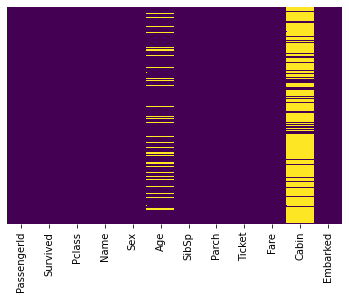

In [ ]:
sns.heatmap(titanic_df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

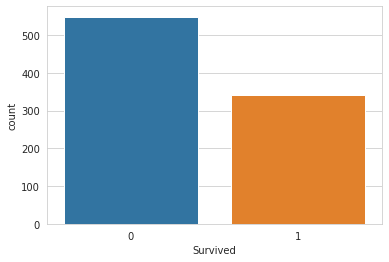

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic_df_train)

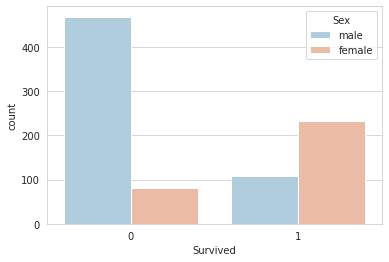

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic_df_train,palette='RdBu_r')

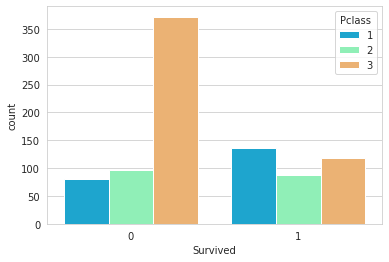

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic_df_train,palette='rainbow')

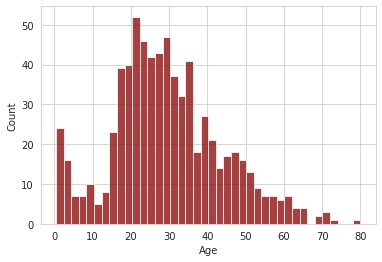

In [ ]:
sns.histplot(titanic_df_train['Age'].dropna(),kde=False,color='darkred',bins=40)

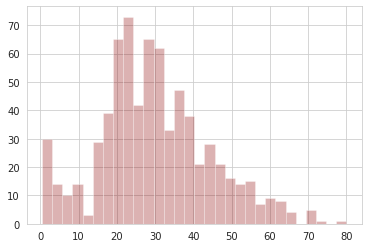

In [ ]:
titanic_df_train['Age'].hist(bins=30,color='darkred',alpha=0.3)

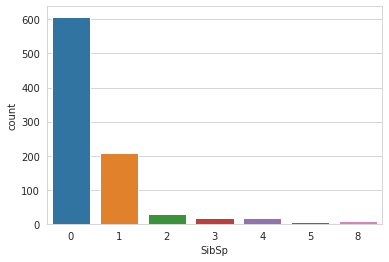

In [ ]:
sns.countplot(x='SibSp',data=titanic_df_train)

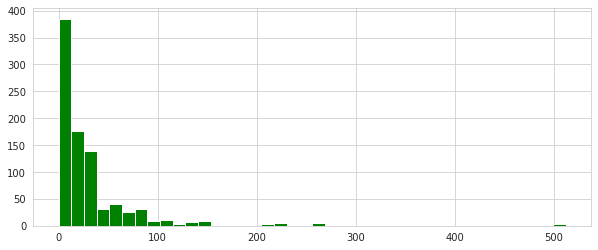

In [ ]:
titanic_df_train['Fare'].hist(color='green',bins=40,figsize=(10,4))


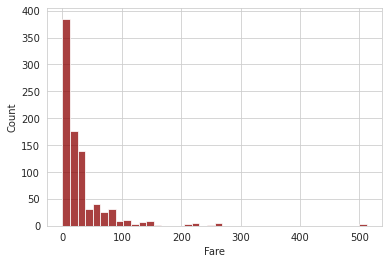

In [ ]:
sns.histplot(titanic_df_train['Fare'].dropna(),kde=False,color='darkred',bins=40)

**Cufflinks for plots**

In [ ]:
import cufflinks as cf
cf.go_offline()

In [ ]:
titanic_df_train['Fare'].iplot(kind='hist',bins=30,color='green')


**Data Cleaning**

Para la edad vamos a completar los datos faltan en lugar de simplemente descartar las filas de datos faltantes. Una forma de hacerlo es completando la edad media de todos los pasajeros (imputación). Sin embargo, verifiquemos la edad promedio por clase de pasajero.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



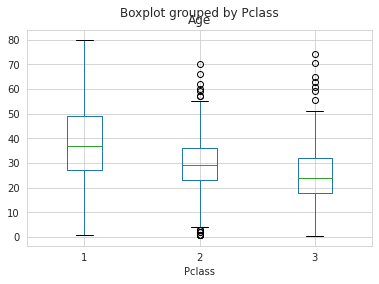

In [ ]:
titanic_df_train.boxplot('Age', 'Pclass', rot=0)

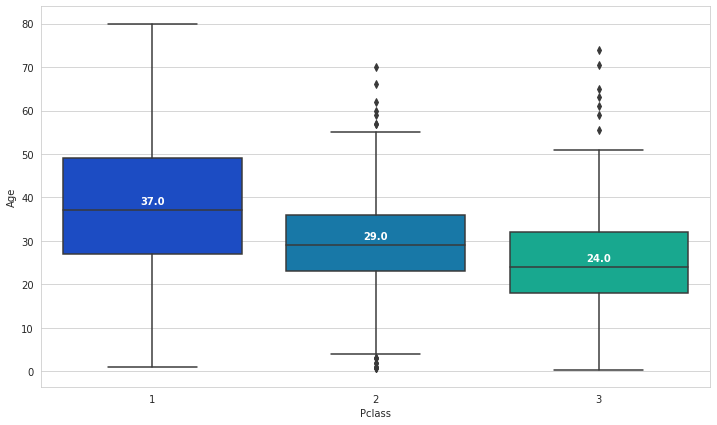

In [ ]:
plt.figure(figsize=(12, 7))
box_plot = sns.boxplot(x='Pclass',y='Age',data=titanic_df_train,palette='winter')

medians = titanic_df_train.groupby(['Pclass'])['Age'].median()
vertical_offset = titanic_df_train['Age'].median() * 0.05

for xtick in box_plot.get_xticks():
  #print(xtick)
  box_plot.text(
            xtick,
            medians[xtick + 1] + vertical_offset,
            medians[xtick + 1],
            horizontalalignment='center',
            size='medium',
            color='w',
            weight='semibold',
        )
    

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    #print(cols)
    if pd.isnull(Age):

        if Pclass == 1:
            return medians[1]

        elif Pclass == 2:
            return medians[2]

        else:
            return medians[3]

    else:
        return Age

In [ ]:
titanic_df_train['Age'] = titanic_df_train[['Age','Pclass']].apply(impute_age,axis=1)

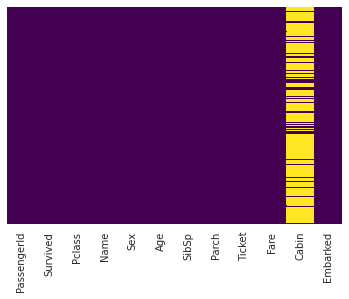

In [ ]:
sns.heatmap(titanic_df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
titanic_df_train.drop('Cabin',axis=1,inplace=True)

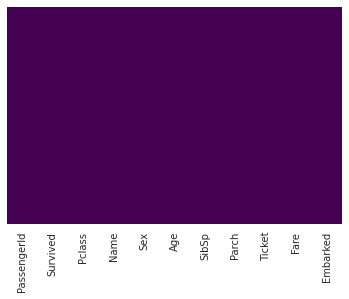

In [ ]:
sns.heatmap(titanic_df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
titanic_df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
titanic_df_train.shape

(891, 11)

In [ ]:
titanic_df_train.dropna(inplace=True) #axis = 0 por defecto remueve filas
titanic_df_train.shape

(889, 11)

**Conversión de variables categóricas**

Vamos a convertir variables categóricas en variables ficticias usando pandas. De lo contrario, nuestro algoritmo de aprendizaje automático no podrá tomar directamente esas características como entradas.

In [ ]:
titanic_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


**Embarked:**



In [ ]:
#print(titanic_df_train['Embarked'])
pd.get_dummies(titanic_df_train['Sex']).head()
pd.get_dummies(titanic_df_train['Embarked']).head()


,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
titanic_df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
sex = pd.get_dummies(titanic_df_train['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_df_train['Embarked'],drop_first=True)

In [ ]:
titanic_df_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
titanic_df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


**Building a Logistic Regression model**



**Train Test Split**

In [ ]:
titanic_df_train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [ ]:
titanic_df_train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
titanic_df_train.shape

(889, 7)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(titanic_df_train.drop('Survived',axis=1), 
                                                    titanic_df_train['Survived'], test_size=0.30, 
                                                    random_state=100)

print(X_train)
print(y_train)

print(X_test)
print(y_test)

     PassengerId  Pclass   Age  SibSp  Parch     Fare
86            87       3  16.0      1      3  34.3750
889          890       1  26.0      0      0  30.0000
162          163       3  26.0      0      0   7.7750
760          761       3  24.0      0      0  14.5000
409          410       3  24.0      3      1  25.4667
..           ...     ...   ...    ...    ...      ...
857          858       1  51.0      0      0  26.5500
873          874       3  47.0      0      0   9.0000
837          838       3  24.0      0      0   8.0500
793          794       1  37.0      0      0  30.6958
521          522       3  22.0      0      0   7.8958

[622 rows x 6 columns]
86     0
889    1
162    0
760    0
409    0
      ..
857    1
873    0
837    0
793    0
521    0
Name: Survived, Length: 622, dtype: int64
     PassengerId  Pclass   Age  SibSp  Parch     Fare
639          640       3  24.0      1      0  16.1000
147          148       3   9.0      2      2  34.3750
278          279       3 

**Entrenando y Prediciendo**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression(max_iter=2000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test, predictions)

In [ ]:
cm

array([[137,  23],
       [ 67,  40]])

Text(33.0, 0.5, 'Actual')

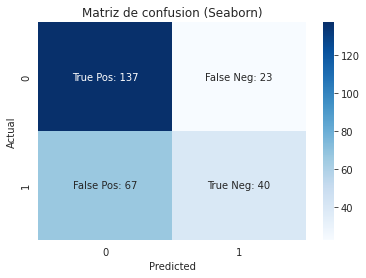

In [ ]:
labels = ['True Pos: ' + str(cm[0][0]),'False Neg: ' + str(cm[0][1]),'False Pos: ' + str(cm[1][0]),'True Neg: ' + str(cm[1][1])]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, cmap='Blues', annot=labels, fmt='')
plt.title('Matriz de confusion (Seaborn)')
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['True','False'])
#ax.yaxis.set_ticklabels(['True','False'])
#ax.invert_yaxis() 
#ax.invert_xaxis()



In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test,predictions).ravel()

In [ ]:
(tp, fn, fp, tn)

(137, 23, 67, 40)

Precision = TP/(TP + FP) = 137/(137 + 67) = 0.6715

Recall = TP/(TP + FN) = 137/(137 + 23) = 0.8562

F1-Score = 2*Recall*Precision/(Recall + Precision) = 2*0.8562*0.6715/(0.6715 + 0.8562) = 1.1499/1.5277 = 0.7527

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score=accuracy_score(y_test,predictions)
accuracy_score


0.6629213483146067

In [ ]:
error = 1 - accuracy_score
error

0.3370786516853933

In [ ]:
#predictions

**Evaluacion**

Podemos verificar la precision, recall, f1-score usando el informe de clasificación

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75       160
           1       0.63      0.37      0.47       107

    accuracy                           0.66       267
   macro avg       0.65      0.62      0.61       267
weighted avg       0.66      0.66      0.64       267



**PRACTICA:** 

Dados los siguientes datos hallar la matriz de confusion:

# valores reales
y_test = [1,0,0,1,0,0,1,0,0,1]
# valores predichos
predictions = [1,0,0,1,0,0,0,1,0,0]

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#valores reales para test
y_test = [1,0,0,1,0,0,1,0,0,1]

#valores predichos
predictions = [1,0,0,1,0,0,0,1,0,0]

In [ ]:
cm=confusion_matrix(y_test, predictions)

In [ ]:
print('Confusion matrix : \n',cm)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_test,predictions).ravel()
print('Outcome values : \n', tp, fn, fp, tn)

Confusion matrix : 
 [[5 1]
 [2 2]]
Outcome values : 
 5 1 2 2


In [ ]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,predictions,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           0       0.71      0.83      0.77         6

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10

